In [1]:
####### Import #######
from sklearn.datasets import fetch_openml
import sklearn
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn import neural_network
from sklearn import metrics
import numpy as np
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
####### Loading data #######
mnist = fetch_openml('mnist_784',as_frame=False)
# images = mnist.data.reshape((-1, 28, 28))
# plt.imshow(images[0],cmap=plt.cm.gray_r,interpolation="nearest")
# plt.show()
# print("Classe : ", mnist.target[0])

In [4]:
####### Division des données pour train/test #######
# xtrain data set d'entraînement et ytrain étiquettes de xtrain
# xtest dataset de prédiction et ytest étiquettes de xtest
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(mnist.data, mnist.target,train_size=0.7)

In [4]:
####### Premier modèle de Classifier #######

#Entraîne le classifier
clf = neural_network.MLPClassifier(random_state=1, max_iter=100, hidden_layer_sizes=(50))
print("Training...")
clf.fit(xtrain, ytrain)

#Prédiction sur le jeu de tests
print("Predicting...")
pred = clf.predict(xtest)
#print("Prédiction : ", pred)
# Probabilités des prédictions sur xtest
pred_proba = clf.predict_proba(xtest)
#print("Probabilités : ", pred_proba)
# On calcule le score obtenu sur xtest avec les étiquettes ytest
score = clf.score(xtest, ytest)
print("Score échantillon de test : ", score)

#Infos image 4
print("Classe image 4 : ", ytest[3])
print("Classe prédite image 4 : ", pred[3])

#Calcul de différentes metrics
print("Précision pour chaque classe : \n", metrics.precision_score(ytest, pred,average=None))
print("Matrice de confusion :\n", metrics.confusion_matrix(ytest, pred))
print("Zero-one classification loss :\n", metrics.zero_one_loss(ytest, pred))

Training...
Predicting...
Score échantillon de test :  0.9493333333333334
Classe image 4 :  9
Classe prédite image 4 :  9
Précision pour chaque classe : 
 [0.97175682 0.97969543 0.95804541 0.93567251 0.94288528 0.95647383
 0.94714286 0.95737855 0.89422181 0.94911067]
Matrice de confusion :
 [[2030    0   10    2    2    5   17    1   27    1]
 [   0 2316    6    9    9    6    3    6   22    2]
 [  17   10 1941   15    9    5   21   28   48    1]
 [   2    0   25 2080    1   22    1   13   43    7]
 [   7    8    9    2 1915    4   21    4   13   43]
 [   5    4    1   45    2 1736   29    1   29   16]
 [   8    2    5    0   10    7 1989    0   18    0]
 [   8    4   18   10    8    1    1 2089    4   28]
 [   2   12    9   20   13   19   15    5 1919    5]
 [  10    8    2   40   62   10    3   35   23 1921]]
Zero-one classification loss :
 0.05066666666666664


In [5]:
####### Variations du nombres de couches de 1 à 100 couches cachées #######

list_training_times_k = []
list_precision_scores_k = []
list_zero_one_loss_k = []
 
for i in range(1, 101, 9):
    print("Computing for ", i, " hidden layers...")
    #Entraîne le classifier
    clf = neural_network.MLPClassifier(random_state=1, max_iter=25, hidden_layer_sizes=((50,) * i))
    t1 = round(time.time(),5)
    clf.fit(xtrain, ytrain)
    t2 = round(time.time(),5)
    #Prédiction sur le jeu de tests
    pred = clf.predict(xtest)
    # Probabilités des prédictions sur xtest
    pred_proba = clf.predict_proba(xtest)
    # On sauvegarde le temps de calcul, la précision et 
    # les taux d'erreurs par classe
    list_training_times_k.append(t2-t1)
    list_precision_scores_k.append(clf.score(xtest, ytest))
    list_zero_one_loss_k.append(metrics.zero_one_loss(ytest, pred))
    
print("Done")
# print("Liste des scores : \n", list_precision_scores)

Computing for  1  hidden layers...
Computing for  10  hidden layers...
Computing for  19  hidden layers...
Computing for  28  hidden layers...
Computing for  37  hidden layers...
Computing for  46  hidden layers...
Computing for  55  hidden layers...
Computing for  64  hidden layers...
Computing for  73  hidden layers...
Computing for  82  hidden layers...
Computing for  91  hidden layers...
Computing for  100  hidden layers...
Done


Text(36.0, 0.5, 'Zero-one loss')

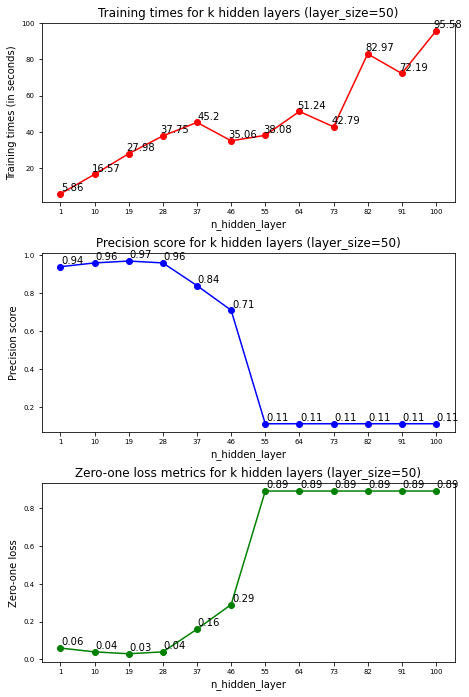

In [6]:
##### x coordinates
x = np.arange(1,101,9)
training_times = list_training_times_k
precision_scores = list_precision_scores_k
zero_one_loss = list_zero_one_loss_k
        
training_times = [round(i,2) for i in training_times]
precision_scores = [round(i,2) for i in precision_scores]
zero_one_loss = [round(i,2) for i in zero_one_loss]

### Create plot
fig, figs = plt.subplots(nrows=3, ncols=1, figsize=(7,10))
fig.tight_layout(pad=3.0)
figs[0].plot(x,training_times, marker='o', color='r')
figs[1].plot(x,precision_scores, marker='o', color='b')
figs[2].plot(x,zero_one_loss, marker='o', color='g')

### Add every x coordinates
figs[0].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
figs[1].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
figs[2].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)

for i in range(len(x)):
    figs[0].annotate(training_times[i], # this is the text
                 (x[i],training_times[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(12,3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[1].annotate(precision_scores[i], # this is the text
                 (x[i],precision_scores[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(12,3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[2].annotate(zero_one_loss[i], # this is the text
                 (x[i],zero_one_loss[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(12,3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

figs[0].set_xticks(x)
figs[1].set_xticks(x)
figs[2].set_xticks(x)
    
### Add title and axis names
figs[0].title.set_text('Training times for k hidden layers (layer_size=50)')
figs[1].title.set_text('Precision score for k hidden layers (layer_size=50)')
figs[2].title.set_text('Zero-one loss metrics for k hidden layers (layer_size=50)')
figs[0].set_xlabel('n_hidden_layer')
figs[1].set_xlabel('n_hidden_layer')
figs[2].set_xlabel('n_hidden_layer')
figs[0].set_ylabel('Training times (in seconds)')
figs[1].set_ylabel('Precision score')
figs[2].set_ylabel('Zero-one loss')

In [18]:
# list_rounded_scores = [round(i,3) for i in list_scores]
# print(list_rounded_scores)

# n = 1
# max_score = 0
# max_index = 1
# for i in list_rounded_scores:
#     if i > max_score:
#         max_score = i
#         max_index = n
#         n += 1
#     else:
#         n += 1
# print(max_score)
# print(max_index)
# print(list_rounded_scores[max_index-1])

[0.214, 0.114, 0.114, 0.215, 0.377, 0.634, 0.617, 0.531, 0.492, 0.765, 0.706, 0.66, 0.738, 0.838, 0.782, 0.879, 0.846, 0.897, 0.911, 0.87, 0.905, 0.919, 0.879, 0.91, 0.913, 0.922, 0.922, 0.922, 0.918, 0.916, 0.917, 0.919, 0.924, 0.928, 0.929, 0.935, 0.927, 0.923, 0.929, 0.929, 0.931, 0.936, 0.934, 0.927, 0.936, 0.929, 0.935, 0.931, 0.937, 0.93, 0.938, 0.935, 0.938, 0.937, 0.939, 0.938, 0.941, 0.939, 0.941, 0.943, 0.945, 0.941, 0.944, 0.943, 0.941, 0.941, 0.941, 0.945, 0.942, 0.947, 0.945, 0.944, 0.948, 0.939, 0.947, 0.943, 0.94, 0.946, 0.95, 0.945, 0.951, 0.949, 0.947, 0.947, 0.944, 0.95, 0.951, 0.946, 0.951, 0.949, 0.952, 0.948, 0.947, 0.949, 0.95, 0.949, 0.947, 0.946, 0.95, 0.954]
0.954
100
0.954


In [7]:
####### Construction de cinq modèles #######

rand_nb_couches_cachees = np.random.randint(low=1, high=10, size=5)
print("Nombres de couches cachées : ", rand_nb_couches_cachees)
rand_taille_couches = np.random.randint(low=10, high=300, size=5)
print("Taille des couches cachées : ", rand_taille_couches)

#Liste des tuples utilisés comme arguments pour hidden_layer_sizes
list_args = []
for i in range(5):
    list_args += [((rand_taille_couches[i],) * rand_nb_couches_cachees[i])]

list_training_times_models = []
list_precision_scores_models = []
list_zero_one_loss_models = []

for i in range(5):
    print("Computing for ", rand_nb_couches_cachees[i], " hidden layers of size ", rand_taille_couches[i], "...")
    #Entraîne le classifier
    clf = neural_network.MLPClassifier(random_state=1, max_iter=25, hidden_layer_sizes=list_args[i])
    t1 = round(time.time(),5)
    clf.fit(xtrain, ytrain)
    t2 = round(time.time(),5)
    #Prédiction sur le jeu de tests
    pred = clf.predict(xtest)
    # Probabilités des prédictions sur xtest
    pred_proba = clf.predict_proba(xtest)
    # On sauvegarde le temps de calcul, la précision et 
    # les taux d'erreurs par classe
    list_training_times_models.append(t2-t1)
    list_precision_scores_models.append(clf.score(xtest, ytest))
    list_zero_one_loss_models.append(metrics.zero_one_loss(ytest, pred))
print("Done")

Nombres de couches cachées :  [7 2 8 8 7]
Taille des couches cachées :  [ 80  54 283  82 174]
Computing for  7  hidden layers of size  80 ...
Computing for  2  hidden layers of size  54 ...
Computing for  8  hidden layers of size  283 ...
Computing for  8  hidden layers of size  82 ...
Computing for  7  hidden layers of size  174 ...
Done


Text(45.0, 0.5, 'Zero-one loss')

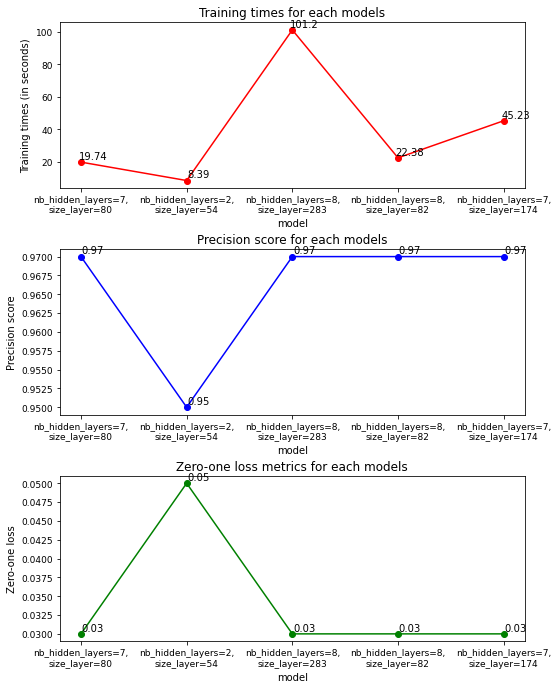

In [8]:
##### x coordinates
x = []
for i in range(len(rand_nb_couches_cachees)):
    x.append("nb_hidden_layers="+str(rand_nb_couches_cachees[i])+",\nsize_layer="+str(rand_taille_couches[i]))
training_times = list_training_times_models
precision_scores = list_precision_scores_models
zero_one_loss = list_zero_one_loss_models
        
training_times = [round(i,2) for i in training_times]
precision_scores = [round(i,2) for i in precision_scores]
zero_one_loss = [round(i,2) for i in zero_one_loss]

### Create plot
fig, figs = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
fig.tight_layout(pad=4.0)
figs[0].plot(x,training_times, marker='o', color='r')
figs[1].plot(x,precision_scores, marker='o', color='b')
figs[2].plot(x,zero_one_loss, marker='o', color='g')

### Add every x coordinates
figs[0].tick_params(axis='both', which='both', labelsize=9, labelbottom=True)
figs[1].tick_params(axis='both', which='both', labelsize=9, labelbottom=True)
figs[2].tick_params(axis='both', which='both', labelsize=9, labelbottom=True)

for i in range(len(x)):
    figs[0].annotate(training_times[i], # this is the text
                 (x[i],training_times[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(12,3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[1].annotate(precision_scores[i], # this is the text
                 (x[i],precision_scores[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(12,3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[2].annotate(zero_one_loss[i], # this is the text
                 (x[i],zero_one_loss[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(12,3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

figs[0].set_xticks(x)
figs[1].set_xticks(x)
figs[2].set_xticks(x)
    
### Add title and axis names
figs[0].title.set_text('Training times for each models')
figs[1].title.set_text('Precision score for each models')
figs[2].title.set_text('Zero-one loss metrics for each models')
figs[0].set_xlabel('model')
figs[1].set_xlabel('model')
figs[2].set_xlabel('model')
figs[0].set_ylabel('Training times (in seconds)')
figs[1].set_ylabel('Precision score')
figs[2].set_ylabel('Zero-one loss')

In [68]:
####### Etude de la convergence des algos d'optimisations #######

list_training_times_opti = []
list_precision_scores_opti = []
list_zero_one_loss_opti = []

solvers = ["adam","lbfgs","sgd"]

for i in solvers:
    print("Computing for solver = ", i, "...")
    #Entraîne le classifier
    clf = neural_network.MLPClassifier(random_state=1, max_iter=25, hidden_layer_sizes=(50,)*10, verbose=True, solver=i)
    t1 = round(time.time(),5)
    clf.fit(xtrain, ytrain)
    t2 = round(time.time(),5)
    #Prédiction sur le jeu de tests
    pred = clf.predict(xtest)
    # Probabilités des prédictions sur xtest
    pred_proba = clf.predict_proba(xtest)
    # On sauvegarde le temps de calcul, la précision et 
    # les taux d'erreurs par classe
    list_training_times_opti.append(t2-t1)
    list_precision_scores_opti.append(clf.score(xtest, ytest))
    list_zero_one_loss_opti.append(metrics.zero_one_loss(ytest, pred))
print("Done")

Computing for solver =  adam ...
Iteration 1, loss = 0.85650213
Iteration 2, loss = 0.26988524
Iteration 3, loss = 0.20729628
Iteration 4, loss = 0.16877153
Iteration 5, loss = 0.15256668
Iteration 6, loss = 0.13732062
Iteration 7, loss = 0.11812157
Iteration 8, loss = 0.11218156
Iteration 9, loss = 0.10456389
Iteration 10, loss = 0.09150458
Iteration 11, loss = 0.08853537
Iteration 12, loss = 0.08494664
Iteration 13, loss = 0.07498355
Iteration 14, loss = 0.06693150
Iteration 15, loss = 0.06702981
Iteration 16, loss = 0.06717589
Iteration 17, loss = 0.06056735
Iteration 18, loss = 0.05594405
Iteration 19, loss = 0.05904609
Iteration 20, loss = 0.05234987
Iteration 21, loss = 0.05235762
Iteration 22, loss = 0.04459628
Iteration 23, loss = 0.04813990
Iteration 24, loss = 0.04149658
Iteration 25, loss = 0.04235831
Computing for solver =  lbfgs ...
Computing for solver =  sgd ...
Iteration 1, loss = 1.07441605
Iteration 2, loss = 0.39002201
Iteration 3, loss = 0.30063719
Iteration 4, loss

Text(18.0, 0.5, 'Zero-one loss')

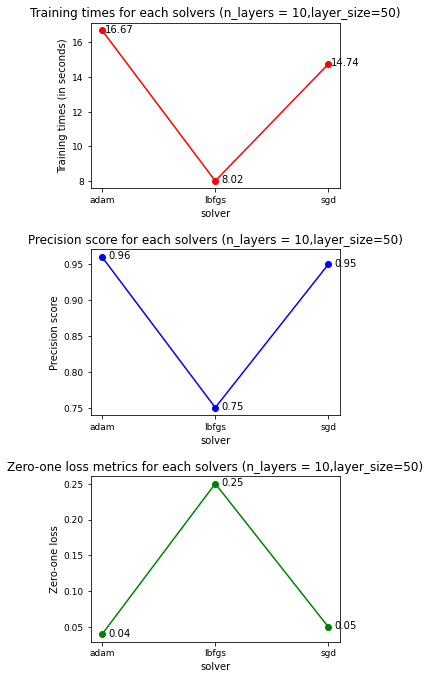

In [79]:
##### x coordinates
x = solvers
training_times = list_training_times_opti
precision_scores = list_precision_scores_opti
zero_one_loss = list_zero_one_loss_opti
        
training_times = [round(i,2) for i in training_times]
precision_scores = [round(i,2) for i in precision_scores]
zero_one_loss = [round(i,2) for i in zero_one_loss]

### Create plot
fig, figs = plt.subplots(nrows=3, ncols=1, figsize=(5,10))
fig.tight_layout(pad=4.0)
figs[0].plot(x,training_times, marker='o', color='r')
figs[1].plot(x,precision_scores, marker='o', color='b')
figs[2].plot(x,zero_one_loss, marker='o', color='g')

### Add every x coordinates
figs[0].tick_params(axis='both', which='both', labelsize=9, labelbottom=True)
figs[1].tick_params(axis='both', which='both', labelsize=9, labelbottom=True)
figs[2].tick_params(axis='both', which='both', labelsize=9, labelbottom=True)

for i in range(len(x)):
    figs[0].annotate(training_times[i], # this is the text
                 (x[i],training_times[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(17,-2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[1].annotate(precision_scores[i], # this is the text
                 (x[i],precision_scores[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(17,-2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[2].annotate(zero_one_loss[i], # this is the text
                 (x[i],zero_one_loss[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(17,-2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

figs[0].set_xticks(x)
figs[1].set_xticks(x)
figs[2].set_xticks(x)
    
### Add title and axis names
figs[0].title.set_text('Training times for each solvers (n_layers = 10,layer_size=50)')
figs[1].title.set_text('Precision score for each solvers (n_layers = 10,layer_size=50)')
figs[2].title.set_text('Zero-one loss metrics for each solvers (n_layers = 10,layer_size=50)')
figs[0].set_xlabel('solver')
figs[1].set_xlabel('solver')
figs[2].set_xlabel('solver')
figs[0].set_ylabel('Training times (in seconds)')
figs[1].set_ylabel('Precision score')
figs[2].set_ylabel('Zero-one loss')

In [7]:
####### Variations des fonctions d'activations #######

list_training_times_acti = []
list_precision_scores_acti = []
list_zero_one_loss_acti = []

activations = ["identity", "logistic", "tanh", "relu"]

for i in activations:
    print("Computing for activations = ", i, "...")
    #Entraîne le classifier
    clf = neural_network.MLPClassifier(random_state=1, max_iter=100, hidden_layer_sizes=(50,)*10, verbose=True, activation=i)
    t1 = round(time.time(),5)
    clf.fit(xtrain, ytrain)
    t2 = round(time.time(),5)
    #Prédiction sur le jeu de tests
    pred = clf.predict(xtest)
    # Probabilités des prédictions sur xtest
    pred_proba = clf.predict_proba(xtest)
    # On sauvegarde le temps de calcul, la précision et 
    # les taux d'erreurs par classe
    list_training_times_acti.append(t2-t1)
    list_precision_scores_acti.append(clf.score(xtest, ytest))
    list_zero_one_loss_acti.append(metrics.zero_one_loss(ytest, pred))
print("Done")

Computing for activations =  identity ...
Iteration 1, loss = 3.11224909
Iteration 2, loss = 0.70854568
Iteration 3, loss = 0.52376870
Iteration 4, loss = 0.43536739
Iteration 5, loss = 0.39083398
Iteration 6, loss = 0.36212214
Iteration 7, loss = 0.34711959
Iteration 8, loss = 0.33529051
Iteration 9, loss = 0.32645959
Iteration 10, loss = 0.31210041
Iteration 11, loss = 0.30752402
Iteration 12, loss = 0.30330625
Iteration 13, loss = 0.29551273
Iteration 14, loss = 0.29731196
Iteration 15, loss = 0.29336812
Iteration 16, loss = 0.28803723
Iteration 17, loss = 0.29129394
Iteration 18, loss = 0.28711416
Iteration 19, loss = 0.28879544
Iteration 20, loss = 0.28476943
Iteration 21, loss = 0.28758300
Iteration 22, loss = 0.29131686
Iteration 23, loss = 0.28409160
Iteration 24, loss = 0.28754863
Iteration 25, loss = 0.28786580
Iteration 26, loss = 0.28697806
Iteration 27, loss = 0.28521567
Iteration 28, loss = 0.28971331
Iteration 29, loss = 0.28413101
Iteration 30, loss = 0.28784417
Iterati

x :  ['identity', 'logistic', 'tanh', 'relu']
training_times :  [34.288330078125, 33.1211998462677, 171.96871995925903, 106.40883994102478]
precision_scores :  [0.9074285714285715, 0.11142857142857143, 0.9351904761904762, 0.9683333333333334]
zero_one_loss :  [0.09257142857142853, 0.8885714285714286, 0.06480952380952376, 0.03166666666666662]


Text(36.0, 0.5, 'Zero-one loss')

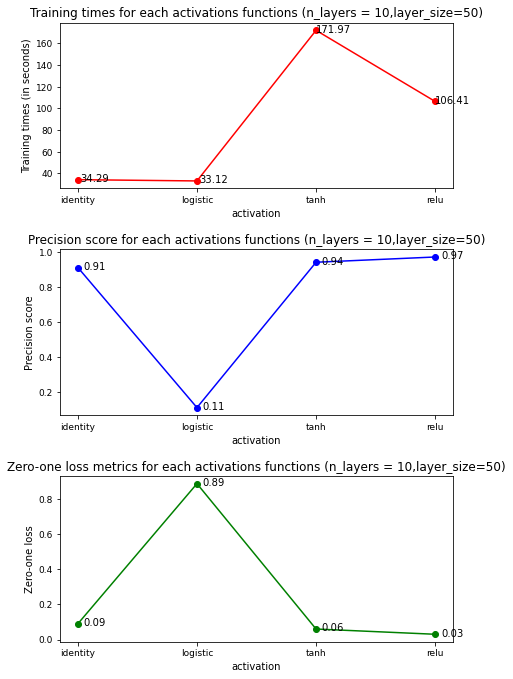

In [9]:
##### x coordinates
x = activations
training_times = list_training_times_acti
precision_scores = list_precision_scores_acti
zero_one_loss = list_zero_one_loss_acti
print("x : ",x)
print("training_times : ",training_times)
print("precision_scores : ",precision_scores)
print("zero_one_loss : ",zero_one_loss)
        
training_times = [round(i,2) for i in training_times]
precision_scores = [round(i,2) for i in precision_scores]
zero_one_loss = [round(i,2) for i in zero_one_loss]

### Create plot
fig, figs = plt.subplots(nrows=3, ncols=1, figsize=(7,10))
fig.tight_layout(pad=4.0)
figs[0].plot(x,training_times, marker='o', color='r')
figs[1].plot(x,precision_scores, marker='o', color='b')
figs[2].plot(x,zero_one_loss, marker='o', color='g')

### Add every x coordinates
figs[0].tick_params(axis='both', which='both', labelsize=9, labelbottom=True)
figs[1].tick_params(axis='both', which='both', labelsize=9, labelbottom=True)
figs[2].tick_params(axis='both', which='both', labelsize=9, labelbottom=True)

for i in range(len(x)):
    figs[0].annotate(training_times[i], # this is the text
                 (x[i],training_times[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(17,-2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[1].annotate(precision_scores[i], # this is the text
                 (x[i],precision_scores[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(17,-2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[2].annotate(zero_one_loss[i], # this is the text
                 (x[i],zero_one_loss[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(17,-2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

figs[0].set_xticks(x)
figs[1].set_xticks(x)
figs[2].set_xticks(x)
    
### Add title and axis names
figs[0].title.set_text('Training times for each activations functions (n_layers = 10,layer_size=50)')
figs[1].title.set_text('Precision score for each activations functions (n_layers = 10,layer_size=50)')
figs[2].title.set_text('Zero-one loss metrics for each activations functions (n_layers = 10,layer_size=50)')
figs[0].set_xlabel('activation')
figs[1].set_xlabel('activation')
figs[2].set_xlabel('activation')
figs[0].set_ylabel('Training times (in seconds)')
figs[1].set_ylabel('Precision score')
figs[2].set_ylabel('Zero-one loss')

In [90]:
####### Variations de la régularisation L2 #######

list_training_times_alpha = []
list_precision_scores_alpha = []
list_zero_one_loss_alpha = []

alphas = [0.0000001, 0.0001, 0.1,100]

for i in alphas:
    #Entraîne le classifier
    clf = neural_network.MLPClassifier(random_state=1, max_iter=25, hidden_layer_sizes=(50,)*10, verbose=True, alpha=i)
    t1 = round(time.time(),5)
    clf.fit(xtrain, ytrain)
    t2 = round(time.time(),5)
    #Prédiction sur le jeu de tests
    pred = clf.predict(xtest)
    # Probabilités des prédictions sur xtest
    pred_proba = clf.predict_proba(xtest)
    # On sauvegarde le temps de calcul, la précision et 
    # les taux d'erreurs par classe
    list_training_times_alpha.append(t2-t1)
    list_precision_scores_alpha.append(clf.score(xtest, ytest))
    list_zero_one_loss_alpha.append(metrics.zero_one_loss(ytest, pred))
print("Done")

Iteration 1, loss = 0.86420278
Iteration 2, loss = 0.26996549
Iteration 3, loss = 0.21207782
Iteration 4, loss = 0.16897296
Iteration 5, loss = 0.15104859
Iteration 6, loss = 0.13411933
Iteration 7, loss = 0.11642768
Iteration 8, loss = 0.10925475
Iteration 9, loss = 0.09696347
Iteration 10, loss = 0.08712179
Iteration 11, loss = 0.07829793
Iteration 12, loss = 0.07869050
Iteration 13, loss = 0.07164445
Iteration 14, loss = 0.06658763
Iteration 15, loss = 0.06688489
Iteration 16, loss = 0.06271908
Iteration 17, loss = 0.05857527
Iteration 18, loss = 0.05716217
Iteration 19, loss = 0.05741046
Iteration 20, loss = 0.05091226
Iteration 21, loss = 0.04827472
Iteration 22, loss = 0.04322551
Iteration 23, loss = 0.04547947
Iteration 24, loss = 0.03996680
Iteration 25, loss = 0.04363192
Iteration 1, loss = 0.85650213
Iteration 2, loss = 0.26988524
Iteration 3, loss = 0.20729628
Iteration 4, loss = 0.16877153
Iteration 5, loss = 0.15256668
Iteration 6, loss = 0.13732062
Iteration 7, loss = 0.1

x :  ['1e-07', '0.0001', '0.1', '100']
training_times :  [17.083820104599, 17.386620044708252, 17.509379863739014, 12.109119892120361]
precision_scores :  [0.9652380952380952, 0.9637619047619047, 0.9543809523809523, 0.11223809523809523]
zero_one_loss :  [0.03476190476190477, 0.03623809523809529, 0.04561904761904767, 0.8877619047619048]


Text(36.0, 0.5, 'Zero-one loss')

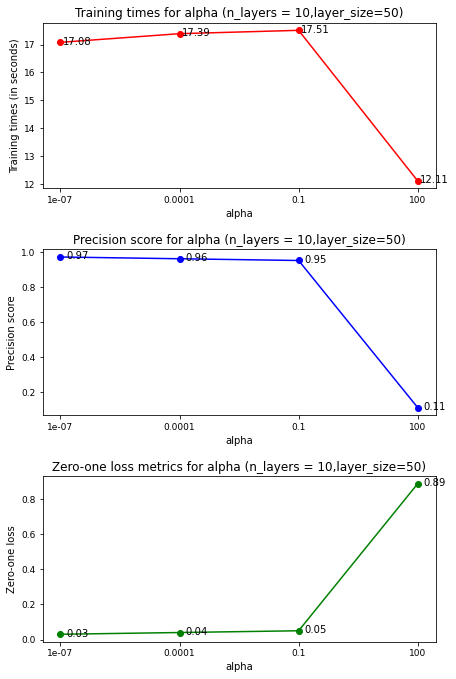

In [92]:
##### x coordinates
x = [str(i) for i in alphas]
training_times = list_training_times_alpha
precision_scores = list_precision_scores_alpha
zero_one_loss = list_zero_one_loss_alpha
print("x : ",x)
print("training_times : ",training_times)
print("precision_scores : ",precision_scores)
print("zero_one_loss : ",zero_one_loss)
        
training_times = [round(i,2) for i in training_times]
precision_scores = [round(i,2) for i in precision_scores]
zero_one_loss = [round(i,2) for i in zero_one_loss]

### Create plot
fig, figs = plt.subplots(nrows=3, ncols=1, figsize=(7,10))
fig.tight_layout(pad=4.0)
figs[0].plot(x,training_times, marker='o', color='r')
figs[1].plot(x,precision_scores, marker='o', color='b')
figs[2].plot(x,zero_one_loss, marker='o', color='g')

### Add every x coordinates
figs[0].tick_params(axis='both', which='both', labelsize=9, labelbottom=True)
figs[1].tick_params(axis='both', which='both', labelsize=9, labelbottom=True)
figs[2].tick_params(axis='both', which='both', labelsize=9, labelbottom=True)

for i in range(len(x)):
    figs[0].annotate(training_times[i], # this is the text
                 (x[i],training_times[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(17,-2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[1].annotate(precision_scores[i], # this is the text
                 (x[i],precision_scores[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(17,-2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[2].annotate(zero_one_loss[i], # this is the text
                 (x[i],zero_one_loss[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(17,-2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

figs[0].set_xticks(x)
figs[1].set_xticks(x)
figs[2].set_xticks(x)
    
### Add title and axis names
figs[0].title.set_text('Training times for alpha (n_layers = 10,layer_size=50)')
figs[1].title.set_text('Precision score for alpha (n_layers = 10,layer_size=50)')
figs[2].title.set_text('Zero-one loss metrics for alpha (n_layers = 10,layer_size=50)')
figs[0].set_xlabel('alpha')
figs[1].set_xlabel('alpha')
figs[2].set_xlabel('alpha')
figs[0].set_ylabel('Training times (in seconds)')
figs[1].set_ylabel('Precision score')
figs[2].set_ylabel('Zero-one loss')

In [9]:
### Create vector of 5000 random indexes
rand_indexes = np.random.randint(70000, size=10000)
### Load data with the previous vector
data = mnist.data[rand_indexes]
# print("Dataset : ", data)
target = mnist.target[rand_indexes]

# Split the dataset
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(data, target,train_size=0.9)

r = 1
max_i = 300
nb_hl = 15
hl_size = 85
hl = ((hl_size,)*nb_hl)
sol = "adam"
act = "relu"
a = 0.0000001

#Entraîne le classifier
clf = neural_network.MLPClassifier(random_state=r, max_iter=max_i, hidden_layer_sizes=hl, solver=sol, activation=act, alpha=a, verbose=False)
t1 = time.time()
clf.fit(xtrain, ytrain)
t2 = time.time()
#Prédiction sur le jeu de tests
pred = clf.predict(xtest)
t3 = time.time()

#Calcul de différentes metrics
precisions = [round(i,3) for i in metrics.precision_score(ytest, pred,average=None)]

print("Métriques pour A-NN")
print("Paramètres : (random_state=1, max_iter=300, hidden_layer_sizes=((85,)*15),")
print("solver=adam, activation=relu, alpha= 0.0000001)")
print("Taille de l'échantillon :", 10000)
print("Proportion des datasets :", "90%")
print("Temps d'entraînement (secondes) :", round(t2-t1,5))
print("Temps de prédiction (secondes) :", round(t3-t2,5))
print("Précision pour chaque classe :", precisions)
print("Précision :", clf.score(xtest, ytest))
print("Erreur :", round(metrics.zero_one_loss(ytest, pred),5))
print("Matrice de confusion :\n", metrics.confusion_matrix(ytest, pred))

Métriques pour A-NN
Paramètres : (random_state=1, max_iter=300, hidden_layer_sizes=((85,)*15),
solver=adam, activation=relu, alpha= 0.0000001)
Taille de l'échantillon : 10000
Proportion des datasets : 90%
Temps d'entraînement (secondes) : 27.9214
Temps de prédiction (secondes) : 0.01396
Précision pour chaque classe : [0.972, 0.974, 0.926, 0.97, 0.919, 0.939, 0.971, 0.967, 0.951, 0.927]
Précision : 0.952
Erreur : 0.048
Matrice de confusion :
 [[103   0   1   0   0   0   1   0   0   0]
 [  0 114   0   0   1   0   0   0   0   0]
 [  0   0 100   0   2   1   1   1   1   0]
 [  0   1   3  97   0   1   0   0   1   1]
 [  0   0   0   0  79   0   0   0   0   4]
 [  2   0   0   3   0  93   1   0   1   0]
 [  0   0   0   0   0   3  99   0   1   0]
 [  1   1   1   0   1   0   0  89   0   1]
 [  0   1   3   0   0   1   0   0  77   2]
 [  0   0   0   0   3   0   0   2   0 101]]
